# Task 1

# Import required python libraries.

In [52]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_circles
from sklearn import metrics
import scipy.cluster.hierarchy as hc
import math
import warnings
warnings.filterwarnings('ignore')

# Set seed value to 42.

In [53]:
np.random.seed(seed=42)

# Define the folowing to generate data.

In [54]:
np.random.seed(seed=42)
def PointsInCircum(r,n=100):
    return [(math.cos(2*math.pi/n*x)*r+np.random.normal(-20,20), math.sin(2*math.pi/n*x)*r+np.random.normal(-20,20))
            for x in range(1,n+1)]
    

# Create 3 sets of data points in the form of three concentric circles with the following pairs of parameters y passing into the defined function(defined in the slide 3):   

In [55]:
data=pd.DataFrame(PointsInCircum(400,900))
data=data.append(PointsInCircum(250,600))
data=data.append(PointsInCircum(90,200))

In [56]:
data

,0,1
0,389.924535,-19.972782
1,392.914780,16.045469
2,375.229206,-16.305771
3,411.428302,6.517350
4,370.366843,4.811000
...,...,...
195,37.750393,-47.336480
196,68.121120,-29.983060
197,109.273249,-53.370906
198,80.067375,6.955294


# Add some noise to this data by applying the following code snippet.

In [57]:
data=data.append([(np.random.randint(-500,500),np.random.randint(-500,500))for i in range(300)])

In [58]:
data

,0,1
0,389.924535,-19.972782
1,392.914780,16.045469
2,375.229206,-16.305771
3,411.428302,6.517350
4,370.366843,4.811000
...,...,...
295,-34.000000,-196.000000
296,484.000000,-357.000000
297,-390.000000,-269.000000
298,190.000000,83.000000


# Draw a scatter plot to visualize the data.

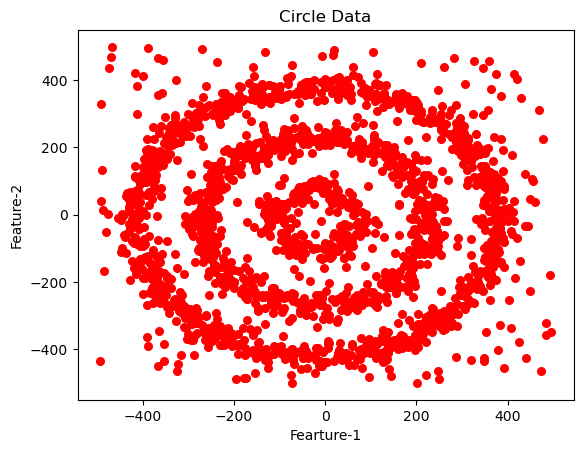

In [59]:
plt.scatter(data[0],data[1],s=30,c='r')
plt.title("Circle Data")
plt.xlabel("Fearture-1")
plt.ylabel("Feature-2")
plt.show()

# Task 2

# Apply the K-means algorithm to cluster the data and plot the resulating clusters.

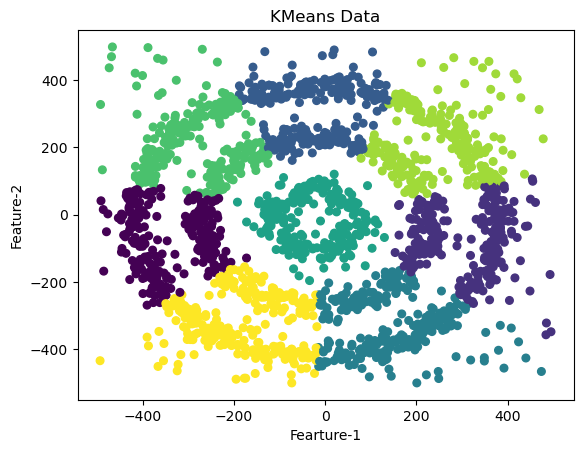

In [60]:
from sklearn.cluster import KMeans
KM=KMeans()
KM.fit(data[[0,1]])
data['KM.labels_']=KM.labels_
plt.scatter(data[0],data[1],s=30,c=data['KM.labels_'])
plt.title("KMeans Data")
plt.xlabel("Fearture-1")
plt.ylabel("Feature-2")
plt.show()

In [61]:
silhouette_score(data,KM.labels_)

0.3858556917923131

# Apply an Agglomertive Hierarchical algorithm to cluster the data and plot the resulating cluster.

In [62]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
for k in range(2,9):
    HC=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage='ward')
    y_HC=HC.fit_predict(data)
    print(k,silhouette_score(data,y_HC))


2 0.321899498904571
3 0.33433695907543187
4 0.3184448454750528
5 0.3070161233740789
6 0.34375096622938306
7 0.35028765411096
8 0.35350021970499484


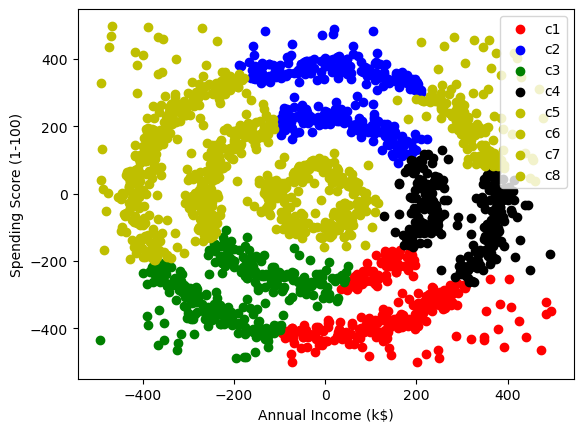

In [50]:
#data=data.to_numpy()
plt.scatter(data[y_HC==0,0],data[y_HC==0,1],color='r',label='c1')
plt.scatter(data[y_HC==1,0],data[y_HC==1,1],color='b',label='c2')
plt.scatter(data[y_HC==2,0],data[y_HC==2,1],color='g',label='c3')
plt.scatter(data[y_HC==3,0],data[y_HC==3,1],color='k',label='c4')
plt.scatter(data[y_HC==4,0],data[y_HC==4,1],color='y',label='c5')
plt.scatter(data[y_HC==5,0],data[y_HC==5,1],color='y',label='c6')
plt.scatter(data[y_HC==6,0],data[y_HC==6,1],color='y',label='c7')
plt.scatter(data[y_HC==7,0],data[y_HC==7,1],color='y',label='c8')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()

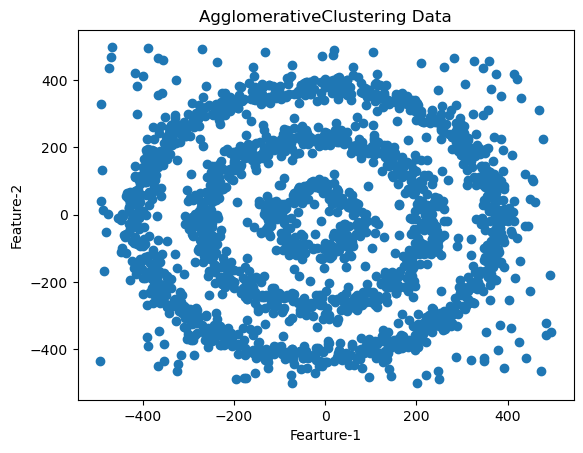

In [63]:
HC1=AgglomerativeClustering(n_clusters=7,affinity='euclidean',linkage='ward')
y_HC1=HC1.fit_predict(data)
silhouette_score(data,y_HC1)  
plt.scatter(data[0],data[1])
plt.title("AgglomerativeClustering Data")
plt.xlabel("Fearture-1")
plt.ylabel("Feature-2")
plt.show()

# Apply the default DBSCAN(without hypermeters) algorithm to cluster the data and plot the resulating clusters.

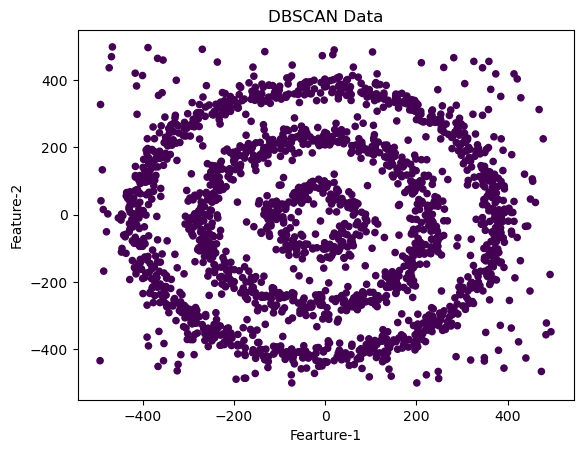

In [64]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN()
dbscan.fit(data[[0,1]])
data['dbscan.labels']=dbscan.labels_
plt.scatter(data[0],data[1],s=20,c=data['dbscan.labels'])
plt.title("DBSCAN Data")
plt.xlabel("Fearture-1")
plt.ylabel("Feature-2")
plt.show()

In [68]:
dbscan.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

# Interpret your observation from each one of the abve sub-tasks.

KMeans=0.3858700090774146
AgglomerativeClustering=0.35028765411096
DBSCAN=-0.1306706700485
Comparing the all Alogrithms the AgglomerativeClustering is getting high silhouette_score as compare to other algorithms.

# Task 3

# Plot K-distance graphto evalute the optimum eps value.

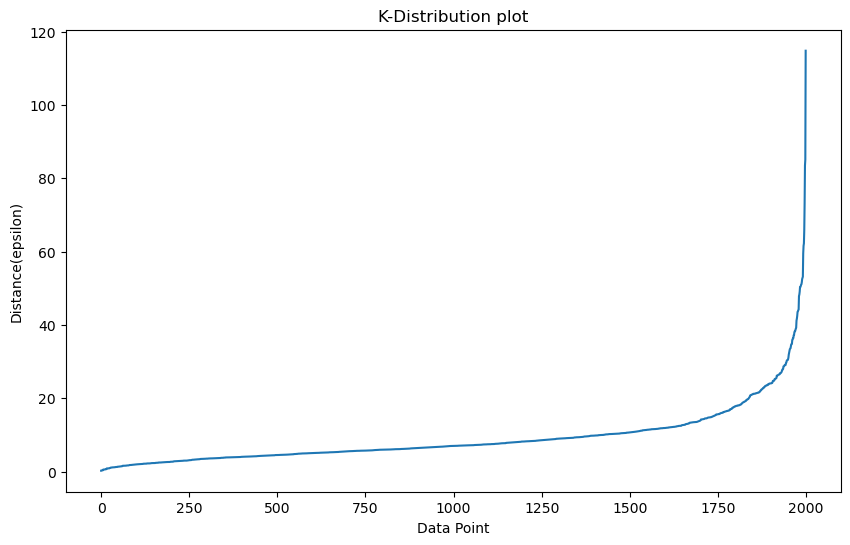

In [138]:
#evaluate the dbscan
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=2)
nrbr=neigh.fit(data[[0,1]])
distance,indices=nrbr.kneighbors(data[[0,1]])
#plotting k-distribution
distances=np.sort(distance,axis=0)
distances=distances[:,1]
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title("K-Distribution plot")
plt.xlabel('Data Point')
plt.ylabel('Distance(epsilon)')
plt.show()

# Find the optimim value of min_samples hypermeter by settig that evaluated value of eps.

In [139]:
eps=30
for min_sample in [8,9,10,11,12,13]:
    clus= DBSCAN(eps=eps,min_samples=min_sample)
    clus_lbl=clus.fit_predict(data)
    x1=clus_lbl+2
    y1=np.bincount(x1)
    ii=np.nonzero(y1)[0]
    results=list(zip(ii,y1[ii]))
    print('eps=',eps,'min_sample=',min_sample,'clustered=',results)



eps= 30 min_sample= 8 clustered= [(1, 157), (2, 973), (3, 656), (4, 214)]
eps= 30 min_sample= 9 clustered= [(1, 163), (2, 970), (3, 654), (4, 213)]
eps= 30 min_sample= 10 clustered= [(1, 175), (2, 964), (3, 649), (4, 212)]
eps= 30 min_sample= 11 clustered= [(1, 187), (2, 809), (3, 149), (4, 644), (5, 211)]
eps= 30 min_sample= 12 clustered= [(1, 196), (2, 370), (3, 435), (4, 147), (5, 642), (6, 210)]
eps= 30 min_sample= 13 clustered= [(1, 222), (2, 300), (3, 262), (4, 168), (5, 146), (6, 60), (7, 300), (8, 334), (9, 208)]


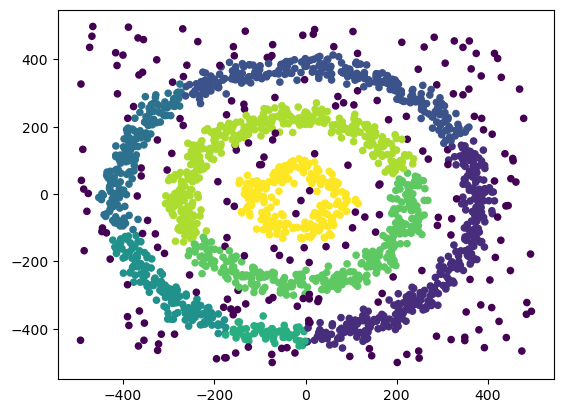

In [146]:
db_model=DBSCAN(eps=30,min_samples=13)
db_model.fit(data[[0,1]])
data['db_model.labels']=db_model.labels_
plt.scatter(data[0],data[1],c=data['db_model.labels'],s=20)

# Finally interpret your observation from all the tasks that you have performed in this practice exercise.

Comparing the all Alogrithms the AgglomerativeClustering is getting high silhouette_score as compare to other algorithms.
diastnce or eps value=30. 
min_samples=13